In [2]:
import numpy as np
import matplotlib.pyplot as plt
import similaritymeasures

def calculate_reward(target_signal, arousal_signal):
    arousal_signal = np.expand_dims(np.array(arousal_signal), axis=1)
    target_signal = np.expand_dims(np.array(target_signal), axis=1)
    target_x = np.expand_dims(np.arange(len(target_signal)), axis=1)
    arousal_x = np.expand_dims(np.arange(len(arousal_signal)), axis=1)
    arousal_signal = np.concatenate([arousal_x, arousal_signal.copy()], axis=1)
    target_signal = np.concatenate([target_x, target_signal], axis=1)
    area = similaritymeasures.area_between_two_curves(target_signal, arousal_signal)
    return -area


[1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1]
43.75


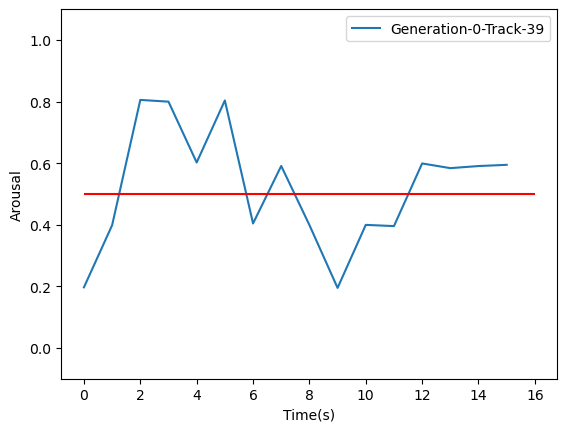

In [5]:
minimize_dict = np.load("../Maximize Changes Cluster 2 Run 2 Results.npy", allow_pickle=True).item()
tracks = minimize_dict['Tracks']

for _, track in tracks.items():
    target_signal = np.ones((len(track['Arousals'])))
    if len(target_signal) == 0:
        track['Fitness'] = -1000
        continue
    track['Fitness'] = calculate_reward(target_signal, track['Arousals'])
    # print(track['Fitness'])

sorted_mins = dict(sorted(tracks.items(), key=lambda item: item[1]['Fitness'], reverse=True))

plt.figure()
max_length = 0
random_counter, optimized_counter = 0, 0

for i in sorted_mins.keys():
    # if 'Generation-35' in i:
    arousal_trace = np.array([value for value in sorted_mins[i]['Arousals']])
    for value in arousal_trace:
        if value < 0.5:
            optimized_counter += 1
    plt.plot(arousal_trace, label=i)
    max_length = max(max_length, len(arousal_trace))
    print(sorted_mins[i]['Actions'])
    print(optimized_counter/len(arousal_trace)*100)
    break
   
plt.hlines(y=0.5, xmin=0, xmax=max_length, color="red")
plt.ylim([-0.1,1.1])
plt.xlabel("Time(s)")
plt.ylabel("Arousal")
plt.legend(loc="upper right")
plt.show()

In [18]:
import random

seed1 =  np.array([[random.randint(0, 4) for _ in range(10)] for __ in range(50)])
seed2 = np.array([[random.randint(0, 4) for _ in range(10)] for __ in range(50)])
seed3 = np.array([[random.randint(0, 4) for _ in range(10)] for __ in range(50)])
seed4 = np.array([[random.randint(0, 4) for _ in range(10)] for __ in range(50)])
seed5 = np.array([[random.randint(0, 4) for _ in range(10)] for __ in range(50)])

seed_tracks = {"Seed_1": seed1, "Seed_2": seed2, "Seed_3": seed3, "Seed_4": seed4, "Seed_5": seed5}
np.save("seed_tracks.npy", seed_tracks)